# Scatter plot US Accidents by lat/long

In [63]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [66]:
# read traffic data
path="../data/YK_all2017-2019_accidents.csv"
traffic_df=pd.read_csv(path)
traffic_df.head()


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
0,A-9207,MapQuest,201.0,3,2017-01-01 00:17:36,2017-01-01 00:47:12,37.925392,-122.320595,NaN,NaN,...,False,False,False,True,False,Night,Night,Night,Night,2017
1,A-9208,MapQuest,201.0,3,2017-01-01 00:26:08,2017-01-01 01:16:06,37.878185,-122.307175,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2017
2,A-9209,MapQuest,201.0,2,2017-01-01 00:53:41,2017-01-01 01:22:35,38.014820,-121.640579,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2017
3,A-9210,MapQuest,241.0,3,2017-01-01 01:18:51,2017-01-01 01:48:01,37.912056,-122.323982,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2017
4,A-9211,MapQuest,222.0,3,2017-01-01 01:20:12,2017-01-01 01:49:47,37.925392,-122.320595,NaN,NaN,...,False,False,False,True,False,Night,Night,Night,Night,2017


In [43]:
#traffic_df.columns #debug print

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year'],
      dtype='object')

In [61]:
# states abbr
states=traffic_df['State'].unique()
states

array(['CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI', 'IN', 'MI',
       'OH', 'NY', 'NJ', 'CT', 'MA', 'NH', 'RI', 'PA', 'MD', 'VA', 'DC',
       'WV', 'DE', 'TX', 'WA', 'OR', 'KY', 'AL', 'NC', 'MN', 'OK', 'LA',
       'TN', 'UT', 'CO', 'AZ', 'NV', 'KS', 'MS', 'NM', 'ME', 'AR', 'WY',
       'VT', 'ID', 'ND', 'MT', 'SD'], dtype=object)

In [59]:
# Severity unique numbers
traffic_df['Severity'].unique()

array([3, 2, 1, 4], dtype=int64)

In [29]:
len(states)

49

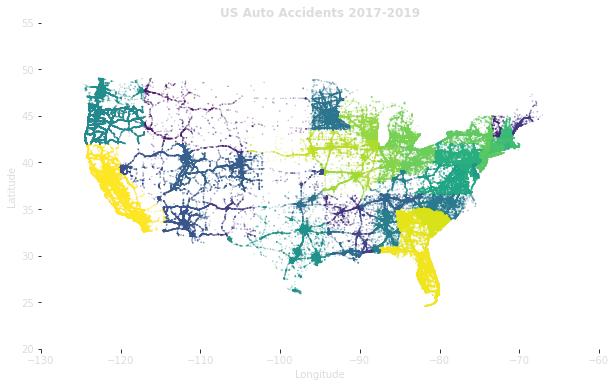

In [68]:
# getting color function
from matplotlib.cm import viridis
# Setting up different color for each state 
max_gini=len(states)*4 
colors=[]
# Setting up plot area
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
plot1=plt.ylim(20, 55)
plot1=plt.xlim(-130, -60)
color_t='gainsboro'
plt.ylabel('Latitude', color=color_t)
plt.xlabel('Longitude', color=color_t)
plt.title('US Auto Accidents 2017-2019', color=color_t,fontweight="bold")
plt.yticks( color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
# looping through all states to plot each state as series with different color
for i in enumerate(states):
    gini = i[0]*4
    inverse_gini =1- gini / max_gini
    mpl_color = viridis(inverse_gini)
    lat=traffic_df['Start_Lat'].loc[traffic_df['State']==i[1]]
    lon=traffic_df['Start_Lng'].loc[traffic_df['State']==i[1]]
# we will use severity to set size of the marker - smaller size for smaller severity
    sev=traffic_df['Severity'].loc[traffic_df['State']==i[1]].astype(int)/10
    plot1=plt.scatter(lon,lat,
                   color=mpl_color,alpha=0.3,s=sev,
                   label=f'{i[1]}')
#plt.legend(loc='right')
plt.savefig('../Analysis/output/YK_US_accidents_scatter_plt.png', facecolor='dimgray')
    
       